In [149]:
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
test = pd.read_csv("fashion-mnist_test.csv")
test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [84]:
train = pd.read_csv("fashion-mnist_train.csv")
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


# EXERCICE

In [110]:
Xtrain = train.drop(['label'], axis=1)
ytrain = train['label']

Xtest = test.drop(['label'], axis=1)
ytest = test['label']

X_test = test.drop(['label'], axis=1)
y_test = test['label']

dtc = DecisionTreeClassifier(criterion="gini")
knn = KNeighborsClassifier()
clf = OneVsRestClassifier(SVC())

In [87]:
bag_dtc=BaggingClassifier(base_estimator=dtc, n_estimators=1, bootstrap=True)
bag_dtc=bag_dtc.fit(Xtrain,ytrain)

In [95]:
ytest_pred=bag_dtc.predict(Xtest)
print(bag_dtc.score(Xtest, ytest))

0.7848


In [89]:
bag_knn=BaggingClassifier(base_estimator=knn, n_estimators=1, bootstrap=True)
bag_knn=bag_knn.fit(Xtrain,ytrain)

In [97]:
ytest_pred=bag_knn.predict(Xtest)
print(bag_knn.score(Xtest, ytest))

0.8468


In [111]:
bag_clf=BaggingClassifier(base_estimator=clf, n_estimators=1, bootstrap=True)
bag_clf=bag_clf.fit(X_train,y_train)

In [112]:
ytest_pred=bag_clf.predict(Xtest)
print(bag_clf.score(X_test, y_test))

0.8536666666666667


In [179]:
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(X, y,train_size = 0.2,test_size = 0.1, random_state=1)
bag_clf=BaggingClassifier(base_estimator=clf, n_estimators=1, bootstrap=True)
bag_clf=bag_clf.fit(Xtrain2,ytrain2)

In [180]:
len(Xtrain2)

2000

In [181]:
ytest_pred=bag_clf.predict(Xtest2)
print(bag_clf.score(Xtest2, ytest2))

0.814


## 1 - create a BaggingClassifier model from Scikit-learn combining KNeighborsClassifier, OneVsRestClassifier and DecisionTreeClassifier

In [106]:
base_methods=[('dtc',DecisionTreeClassifier(criterion="gini")),('knn',KNeighborsClassifier()),('clf',OneVsRestClassifier(SVC()))]
sc = StackingClassifier(estimators=base_methods)
sc.fit(Xtrain, ytrain).score(Xtest, ytest)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8964

## 2 - display the performance indicators of your model : precision score, recall score and confusion matrix

In [117]:
ytest_pred=sc.predict(X_test)
cr = classification_report(y_test, ytest_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       288
           1       0.99      0.98      0.98       286
           2       0.84      0.83      0.83       311
           3       0.93      0.92      0.93       328
           4       0.85      0.85      0.85       314
           5       0.98      0.94      0.96       308
           6       0.70      0.71      0.71       293
           7       0.94      0.98      0.96       291
           8       0.97      0.98      0.98       302
           9       0.97      0.98      0.98       279

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



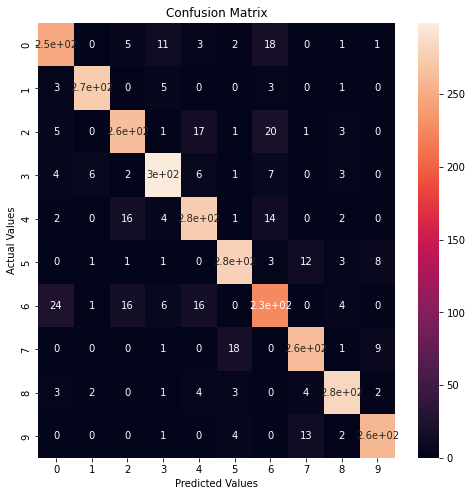

In [136]:
y_pred = sc.predict(X_test)
cm = confusion_matrix(y_test, ytest_pred)
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'],)

plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
#print(confusion_matrix(y_test, ytest_pred))

## 3 - try differents values of combinaison and hyper-parameters. Which is best ?

In [153]:
scores = []
d_range = range(1, 10)

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.1,test_size = 0.05, random_state=1)
for d in d_range:
    print("Method: ", bm)
    bag_model=StackingClassifier(estimators=base_methods,n_jobs=d,final_estimator = LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=10000,
                                                      multi_class='auto',
                                                      n_jobs=d, penalty='l2',
                                                      random_state=None,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),)
    bag_model=bag_model.fit(X_test,y_test)
    ytest_pred=bag_model.predict(X_test)
    scores.append(bag_model.score(X_test, y_test))

Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()
Method:  DecisionTreeClassifier()


Text(0, 0.5, 'Testing Accuracy')

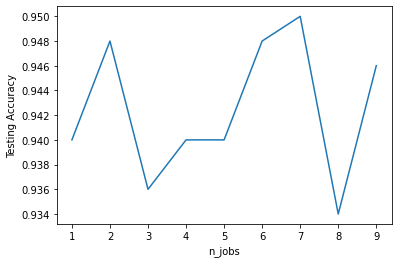

In [154]:
plt.plot(d_range, scores)
plt.xlabel('n_jobs')
plt.ylabel('Testing Accuracy')

# RANDOM FOREST

## 1 - create a RandomForestClassifier model from Scikit-learn.

In [156]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(Xtrain,ytrain)
ypred = rfc.predict(Xtest)

## 2 - display the performance indicators of your model : precision score, recall score and confusion matrix

In [159]:
print("Accuracy:",rfc.score(Xtest, ytest))

Accuracy: 0.8843


In [161]:
cr = classification_report(ytest, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.81      0.86      0.83      1000
           5       0.97      0.94      0.96      1000
           6       0.75      0.61      0.68      1000
           7       0.93      0.93      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



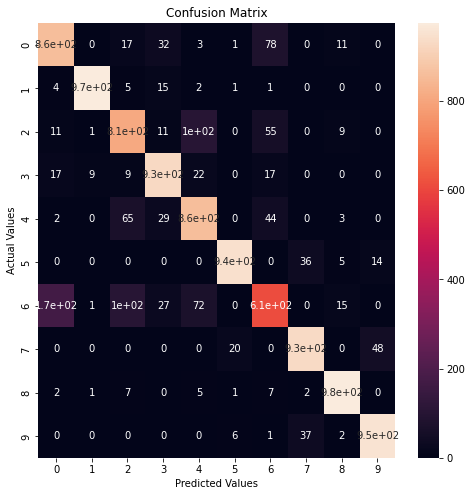

In [162]:
cm = confusion_matrix(ytest, ypred)
cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3','4','5','6','7','8','9'], 
                     columns = ['0','1','2','3','4','5','6','7','8','9'],)

plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
#print(confusion_matrix(y_test, ytest_pred))

## 3 - try differents number of trees in the forest. Which is best ?

In [168]:
trees = []
d_range = range(1, 50)
for d in d_range:
    print("Method: ", rfc)
    rfc = RandomForestClassifier(
                                    n_estimators=100,
                                    max_depth=d
                                )
    rfc=rfc.fit(Xtest,ytest)
    trees.append(rfc.score(Xtest, ytest))

Method:  RandomForestClassifier(max_depth=9)
Method:  RandomForestClassifier(max_depth=1)
Method:  RandomForestClassifier(max_depth=2)
Method:  RandomForestClassifier(max_depth=3)
Method:  RandomForestClassifier(max_depth=4)
Method:  RandomForestClassifier(max_depth=5)
Method:  RandomForestClassifier(max_depth=6)
Method:  RandomForestClassifier(max_depth=7)
Method:  RandomForestClassifier(max_depth=8)
Method:  RandomForestClassifier(max_depth=9)
Method:  RandomForestClassifier(max_depth=10)
Method:  RandomForestClassifier(max_depth=11)
Method:  RandomForestClassifier(max_depth=12)
Method:  RandomForestClassifier(max_depth=13)
Method:  RandomForestClassifier(max_depth=14)
Method:  RandomForestClassifier(max_depth=15)
Method:  RandomForestClassifier(max_depth=16)
Method:  RandomForestClassifier(max_depth=17)
Method:  RandomForestClassifier(max_depth=18)
Method:  RandomForestClassifier(max_depth=19)
Method:  RandomForestClassifier(max_depth=20)
Method:  RandomForestClassifier(max_depth=21

Text(0, 0.5, 'Testing Accuracy')

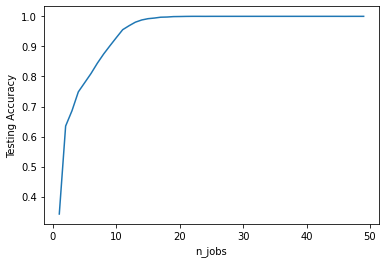

In [170]:
plt.plot(d_range, trees)
plt.xlabel('n_jobs')
plt.ylabel('Testing Accuracy')